# Week 10 Practical Tasks
## KNN Classifier and Naive Bayes Classifier

### 1. Classifying Iris Species with KNN Classifier
In this section, we will go through a simple machine learning application and create
our first classification model. In the process, we will introduce some core concepts and terms.

Let’s assume that a hobby botanist is interested in distinguishing the species of some
iris flowers that she has found. She has collected some measurements associated with
each iris: the length and width of the petals and the length and width of the sepals, all
measured in centimeters.

She also has the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species setosa, versicolor, or virginica. For these
measurements, she can be certain of which species each iris belongs to. Let’s assume
that these are the only species our hobby botanist will encounter in the wild.

Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris.

Reference: Introduction to Machine learning with Python

* ### Import Data

The sklearn package provides some built-in real-world data sets to let users experience working on a real-world data analysis applications. The Iris data set is one of them. Please refer to https://scikit-learn.org/stable/datasets/index.html for more information about these built-in data sets.

In [2]:
from sklearn import datasets
import numpy as np
float_formatter = "{:.6f}".format
np.set_printoptions(formatter={'float_kind': float_formatter})


iris_data = datasets.load_iris()

print("Feature names: \n", iris_data.feature_names)
print("Target names: \n", iris_data.target_names)

print("Feature data size: \n", iris_data.data.shape)
print("Target data size: \n", iris_data.target.shape)
print("Target values: \n", iris_data.target)


Feature names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: 
 ['setosa' 'versicolor' 'virginica']
Feature data size: 
 (150, 4)
Target data size: 
 (150,)
Target values: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


* ### Training and Testing Data

We want to build a machine learning model from this data that can predict the species
of iris for a new set of measurements. But before we can apply our model to new
measurements, we need to know whether it actually works—that is, whether we
should trust its predictions.

To assess the model’s performance, we show it new data (data that it hasn’t seen
before) for which we have labels. This is usually done by splitting the labeled data we
have collected (here, our 150 flower measurements) into two parts. One part of the
data is used to build our machine learning model, and is called the training data or
training set. The rest of the data will be used to assess how well the model works; this
is called the test data, test set, or hold-out set.

scikit-learn contains a function that shuffles the dataset and splits it for you: the
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) function. As default, this function extracts 75% of the rows in the data as the
training set, together with the corresponding labels for this data. The remaining 25%
of the data, together with the remaining labels, is declared as the test set. Deciding
how much data you want to put into the training and the test set respectively is somewhat
arbitrary, but using a test set containing 25% of the data is a good rule of thumb.

In scikit-learn, data is usually denoted with a capital X, while labels are denoted by
a lowercase y. This is inspired by the standard formulation f(x)=y in mathematics,
where x is the input to a function and y is the output. Following more conventions
from mathematics, we use a capital X because the data is a two-dimensional array (a
matrix) and a lowercase y because the target is a one-dimensional array (a vector).
Let’s call train_test_split on our data and assign the outputs using this nomenclature:

In [3]:
from sklearn.model_selection import train_test_split


Before making the split, the train_test_split function shuffles the dataset using a
pseudorandom number generator. If we just took the last 25% of the data as a test set,
all the data points would have the label 2, as the data points are sorted by the label
(see the output for iris['target'] shown earlier). Using a test set containing only
one of the three classes would not tell us much about how well our model generalizes. This will result in situation that the training data and testing data have different distributions.
So, we shuffle our data to make sure the test data contains data from all classes.

To make sure that we will get the same output if we run the same function several
times, we provide the pseudorandom number generator with a fixed seed using the
random_state parameter. This will make the outcome deterministic, so this line will
always have the same outcome. We will always fix the random_state in this way when
using randomized procedures.

The output of the train_test_split function is X_train, X_test, y_train, and
y_test, which are all NumPy arrays. X_train contains 75% of the rows of the dataset,
and X_test contains the remaining 25%:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data, iris_data.target, random_state=142)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


* ### K-Nearest Neighbours Classifier

Now we can start building the actual machine learning model. There are many classification
algorithms in scikit-learn that we could use. Here we will use a k-nearest
neighbors classifier, which is easy to understand. Building this model only consists of
storing the training set. To make a prediction for a new data point, the algorithm
finds the point in the training set that is closest to the new point. Then it assigns the
label of this training point to the new data point.

All machine learning models in scikit-learn are implemented in their own classes,
which are called Estimator classes. The k-nearest neighbors classification algorithm
is implemented in the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) class in the neighbors module. Before
we can use the model, we need to instantiate the class into an object. This is when we
will set any parameters of the model. The most important parameter of KNeighbors
Classifier is the number of neighbors (i.e., $K$), which we will set to 1 for our first exploration.

**Model Training**: To build the model on the training set, we call the 'fit' method of the knn object,
which takes as arguments the NumPy array X_train containing the training data and
the NumPy array y_train of the corresponding training labels.

In [5]:
# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with the training data
clf_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

**Prediction**: We can now make predictions using this model on new data for which we might not
know the correct labels. Imagine we found an iris in the wild with a sepal length of
5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be? We can put this data into a NumPy array, again by
calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4):

In [6]:
# Produce the features of a testing data instance
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

# Predict the result label of X_new:
y_new_pred = clf_knn.predict(X_new)
print("The predicted class is: \n", y_new_pred)


X_new.shape: (1, 4)
The predicted class is: 
 [0]


Our model predicts that this new iris belongs to the class 0, meaning its species is setosa. But how do we know whether we can trust our model? We don’t know the correct species of this sample, which is the whole point of building the model!

**Evaluating Model**: This is where the test set that we created earlier comes in. This data was not used to build the model, but we do know what the correct species is for each iris in the test set. So, we can use the trained model to predict these data instances and calculate the accuracy to evaluate how good the model is.

## Task 1 
Write code to calculate the accuracy score

In [7]:
# [Your code here ...]
print('Accuracy on training set', clf_knn.score(X_train, y_train))
print('Accuracy on test set', clf_knn.score(X_test, y_test))


Accuracy on training set 1.0
Accuracy on test set 0.8947368421052632


* ### Parameter Tuning with Cross Validation (CV)

In this section, we’ll explore a CV method that can be used to tune the hyperparameter $K$ using the above training and test data.

Scikit-learn comes in handy with its [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) method. We specifiy that we are performing 10 folds with the cv=KFold(n_splits=10, shuffle=True) parameter and that our scoring metric should be accuracy since we are in a classification setting. In each iteration, the training data take 90% of the total data while testing data takes 10%. The average on the accuracies reported from each iteration will make the testing accuracy more robust than just a single split of the data.

**Manual tuning with cross validation**: Plot the misclassification error versus $K$. You need to figure out the possible values of $K$. If the number of possible values is too big, you can take some values with a certain step, e.g., $K$ = 1, 5, 10, ... with a step of 5. 

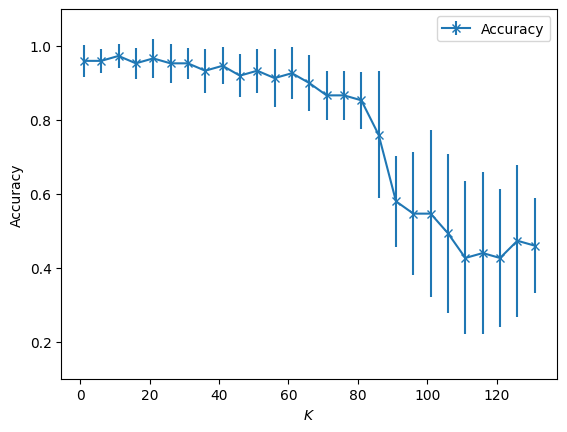

In [8]:
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

cv_scores = []
cv_scores_std = []
k_range = range(1, 135, 5)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf, iris_data.data, iris_data.target,
                             scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std,
             marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


It can be seen that the accuracy first goes up when $K$ increases. It peeks around 15. Then, it keeps going down. Particularly, the performance (measured by the score mean) and its robustness/stableness (measured by the score std) drop substantially around K=85. One possible reason is that when K is bigger than 85, the model suffers from the underfitting issue severely. 

**Automated Parameter Tuning**: Use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) method to accomplish automatic model selection. 

## Task 2
Check against the figure plotted above to see if the selected hyperparameter $K$ can lead to the highest misclassification accuracy. 

In [9]:
# [Your code here ...]
from sklearn.model_selection import GridSearchCV

parameter_grid = {'n_neighbors': k_range}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy',
                   cv=KFold(n_splits=10, shuffle=True))
clf.fit(iris_data.data, iris_data.target)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)


Best K value:  21
The accuracy:  0.9800000000000001


## Task 3
It can be seen that GridSearchCV can help us to the automated hyperparameter tuning. Actually, it also store the intermediate results during the search procrss. The attribute 'cv_results_' of GridSearchCV contains much such informaiton. For example, this attribute contains the 'mean_test_score' and 'std_test_score' for the cross validation. Make use of this information to produce a plot similar to what we did in the manual way. Please check if the two plots comply with each other.

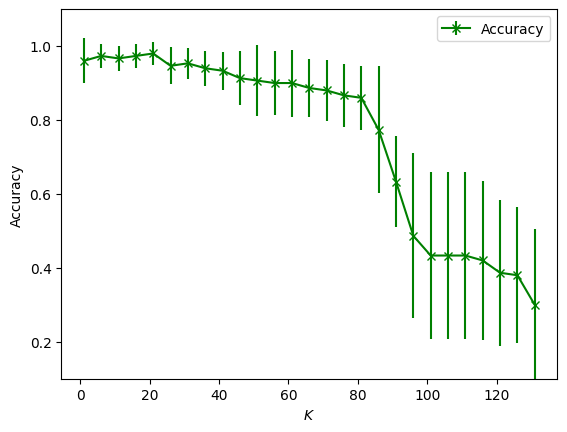

In [10]:
# [Your code here ...]
%matplotlib inline

plt.errorbar(k_range, clf.cv_results_.get('mean_test_score'), yerr=clf.cv_results_.get(
    'std_test_score'), marker='x', label='Accuracy', c='g')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')


### 2. Naive Bayes Classifier
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes' theorem with the "naive" assumption of conditional independence between every pair of features given the value of the class variable. Bayes'theorem states the following relationship, given class variable $y$ and dependent feature vector $x_1$ through $x_n$,:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$$

Using the naive conditional independence assumption, we have

$$\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}$$

Then, we can use Maximum A Posteriori (MAP) estimation to estimate $P(y)$ and $P(x_i \mid y)$; the former is then the relative frequency of class $y$ in the training set.

*References*:
H. Zhang (2004). The optimality of Naive Bayes. Proc. FLAIRS.

* ### Gaussian Naive Bayes

[GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) implements the Gaussian Naive Bayes algorithm for classification on the data sets where features are continuous.   
The likelihood of the features is assumed to be Gaussian:

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

The parameters $\sigma_y$ and $\mu_y$  are estimated using maximum likelihood.

**Demo**: In this demo, we show how to build a Gaussian Naive Bayes classifier.

In [11]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")


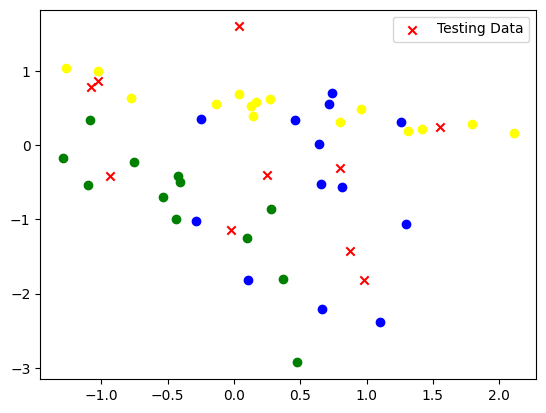

In [12]:
# Generate a synthetica 2D dataset
X, y = make_classification(n_samples=50, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1,
                           weights=None, flip_y=0.01, class_sep=0.5, hypercube=True,
                           shift=0.0, scale=1.0, shuffle=True, random_state=42)

# Data split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42)

# Visualize the generated data
colors = ['blue', 'yellow', 'green']
for i, color in enumerate(colors):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=color)
plt.scatter(X_test[:, 0], X_test[:, 1], c='red',
            marker='x', label='Testing Data')
plt.legend(loc='best')
plt.show()


In [13]:
# Create and training a Gaussian Naive Bayes classifier model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: %.4f\n' % accuracy)


Testing accuracy is: 0.8000



In [14]:
# Explore the learned probability (model parameters)
print('Estimated probability of classess: \n', clf.class_prior_)
print('Estimated mean for each Gaussian distribution: \n', clf.theta_)
print('Estimated variance for each Gaussian distribution: \n', clf.sigma_)


Estimated probability of classess: 
 [0.325000 0.375000 0.300000]
Estimated mean for each Gaussian distribution: 
 [[0.609039 -0.561157]
 [0.396703 0.513019]
 [-0.401613 -0.836859]]
Estimated variance for each Gaussian distribution: 
 [[0.232339 1.048391]
 [0.935212 0.066276]
 [0.330985 0.675591]]


For example, for Class 0 and the first feature, we can have the following Gaussian disribution
$$P(x_0 \mid Class=0) = \frac{1}{\sqrt{2\pi\cdot0.2323}} \exp\left(-\frac{(x_0 - 0.6090)^2}{2\cdot0.2323}\right)$$

In [15]:
# Use 10-fold cross validation to show a more robust prediction accuracy
clf = GaussianNB()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n' % (
    scores.min(), scores.max(), scores.mean(), scores.std()))


Gaussian Naive Bayes accuracy range: [0.4000, 1.0000]; mean: 0.7000; std: 0.1612



## Task 4
Given the training data generated as follows:

In [16]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

# Firstly, let's do the parameter estimation manually without using the model
X_0_C_1 = X[y == 1][:, 0]
X_1_C_1 = X[y == 1][:, 1]
X_0_C_2 = X[y == 2][:, 0]
X_1_C_2 = X[y == 2][:, 1]

manual_means = np.array([[X_0_C_1.mean(), X_1_C_1.mean()], [
                        X_0_C_2.mean(), X_1_C_2.mean()]])
np.set_printoptions(precision=4)
print('Means estaimated manually: \n', manual_means)
manual_vars = np.array([[X_0_C_1.var(), X_1_C_1.var()],
                       [X_0_C_2.var(), X_1_C_2.var()]])
print('Variances estaimated manually: \n', manual_vars)


Means estaimated manually: 
 [[-2.     -1.3333]
 [ 2.      1.3333]]
Variances estaimated manually: 
 [[0.6667 0.2222]
 [0.6667 0.2222]]


 Train a GaussianNB model and print out the learned model parameters (parameters of probability distributions). And check if the learned parameters comply with the manually estimated ones as shown above. Predict the label of a data [-0.8,-1].

In [17]:
# [Your code here ...]

# Create and training a Gaussian Naive Bayes classifier model
clf = GaussianNB()
clf.fit(X, y)

print('Estimated probability of classess: \n', clf.class_prior_)
print('Estimated mean for each Gaussian distribution: \n', clf.theta_)
print('Estimated variance for each Gaussian distribution: \n', clf.sigma_)


X_sample = np.array([[-0.8, -1]])
print('Model prediction for X=', X_sample, 'is y = ', clf.predict(X_sample))


Estimated probability of classess: 
 [0.5 0.5]
Estimated mean for each Gaussian distribution: 
 [[-2.     -1.3333]
 [ 2.      1.3333]]
Estimated variance for each Gaussian distribution: 
 [[0.6667 0.2222]
 [0.6667 0.2222]]
Model prediction for X= [[-0.8 -1. ]] is y =  [1]


* ### Multinomial Naive Bayes
The [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) classification model is suitable for classification with discrete features. To let the model handle to categorical data, we often need to transform the categorical values to numberic ones, through [encoding](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) methods.

In [18]:
# Load the weather data
weather_data = pd.read_csv('files/weather.csv')
print(weather_data.head())
print('\nData shape: ', weather_data.shape)


    Outlook Humidity    Wind Play
0     Sunny     High    Weak   No
1     Sunny     High  Strong   No
2  Overcast     High    Weak  Yes
3      Rain     High    Weak  Yes
4      Rain   Normal    Weak  Yes

Data shape:  (14, 4)


In [19]:
# Data pre-processing and preparation
# Firstly, we need to encode categorical values
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
coded_data = enc.fit_transform(weather_data)

X = coded_data[:, 0:-1]
y = coded_data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [20]:
# Creat and train a model
from sklearn.naive_bayes import MultinomialNB
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)


MultinomialNB()

In [21]:
# Evaluate the model
y_pred = clf_mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is: %.4f\n' % accuracy)


Accuracy is: 0.7500



In [22]:
# Explore the learned model parameters (probabilities)
# Note that the probabilities are in the logorithmic form. Why? The log-sum-exp trick for underflow of probability products
print('Estimated probability of classess: \n', np.e**clf_mnb.class_log_prior_)
print('Estimated class-conditional probabilities for each feature: \n',
      np.e**clf_mnb.feature_log_prob_)


Estimated probability of classess: 
 [0.4 0.6]
Estimated class-conditional probabilities for each feature: 
 [[0.6364 0.1818 0.1818]
 [0.4118 0.2941 0.2941]]


## Task 5
Given the training data generated as follows. The number of data instances (6) is small while the demensionality of the data is relatively highly (100).

In [23]:
X = np.random.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])


Train a MultinomialNB model, and predict the label of a data X_new = [[1,2,1,0,2,3,0,3,2,1,1,3,3,0,4,2,2,0,0,2,2,3,4,4,4,4,0,3,3,
          1,1,1,2,3,1,3,0,2,2,0,4,2,4,3,2,0,1,1,1,2,3,0,0,3,4,3,3,4,
          2,1,0,0,0,0,4,1,2,0,0,4,4,0,4,1,3,1,1,1,3,1,1,1,4,3,1,1,3,
          2,0,0,0,3,4,1,1,4,3,2,3,4]]:

In [24]:
# [Your code here ...]
from sklearn.naive_bayes import MultinomialNB
clf_mnb = MultinomialNB()
clf_mnb.fit(X, y)

X_sample = np.array([[1, 2, 1, 0, 2, 3, 0, 3, 2, 1, 1, 3, 3, 0, 4, 2, 2, 0, 0, 2, 2, 3, 4, 4, 4, 4, 0, 3, 3,
                      1, 1, 1, 2, 3, 1, 3, 0, 2, 2, 0, 4, 2, 4, 3, 2, 0, 1, 1, 1, 2, 3, 0, 0, 3, 4, 3, 3, 4,
                      2, 1, 0, 0, 0, 0, 4, 1, 2, 0, 0, 4, 4, 0, 4, 1, 3, 1, 1, 1, 3, 1, 1, 1, 4, 3, 1, 1, 3,
                      2, 0, 0, 0, 3, 4, 1, 1, 4, 3, 2, 3, 4]])

print('Model prediction for X=', X_sample,
      'is y = ', clf_mnb.predict(X_sample))


Model prediction for X= [[1 2 1 0 2 3 0 3 2 1 1 3 3 0 4 2 2 0 0 2 2 3 4 4 4 4 0 3 3 1 1 1 2 3 1 3
  0 2 2 0 4 2 4 3 2 0 1 1 1 2 3 0 0 3 4 3 3 4 2 1 0 0 0 0 4 1 2 0 0 4 4 0
  4 1 3 1 1 1 3 1 1 1 4 3 1 1 3 2 0 0 0 3 4 1 1 4 3 2 3 4]] is y =  [4]


In our lecture, we discussed that if there is no occurence of some feature values, zero probabilities will appear. To overcome this issue, Laplace correction (smoothing) is proposed, as shown in the follow formula. In the [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) implementation, the parameter 'alpha' controls the way we apply smoothing. The default value is 'alpha=1.0'. Please create and train a model with no Laplace smoothing for the above data set. Compare the leaned model parameters (probabilities) with the case 'alpha=1', by checking if there are zero probabilities (note that due to the accuracy issue, zero might be represented as a signficantly small number by the computer).
$$p(x_{yi}|y)=\frac{N_{yi}+\alpha}{N_y+{\alpha}n}$$

In [25]:
from sklearn.naive_bayes import MultinomialNB
print('Case alpha = 1')
print(
    '''Estimated probability of classess: 
 [0.4 0.6]
Estimated class-conditional probabilities for each feature: 
 [[0.6364 0.1818 0.1818]
 [0.4118 0.2941 0.2941]] \n''')

# [Your code here ...]
clf_mnb = MultinomialNB(alpha=0)
clf_mnb.fit(X_train, y_train)

print('Case alpha = 0')
print('Estimated probability of classess: \n', np.e**clf_mnb.class_log_prior_)
print('Estimated class-conditional probabilities for each feature: \n',
      np.e**clf_mnb.feature_log_prob_)


Case alpha = 1
Estimated probability of classess: 
 [0.4 0.6]
Estimated class-conditional probabilities for each feature: 
 [[0.6364 0.1818 0.1818]
 [0.4118 0.2941 0.2941]] 

Case alpha = 0
Estimated probability of classess: 
 [0.4 0.6]
Estimated class-conditional probabilities for each feature: 
 [[0.75   0.125  0.125 ]
 [0.4286 0.2857 0.2857]]


* ### Comparasion on Iris data
## Task 6
Compare the prediction accuaracy between KNN clasifier (use the optimal K you've identied) and Gaussian Naive Bayes. Use 10-cross validation to report the accuracy mean and standard deviation (Note this is to ensure the comparison is based on robust performace). Which classifidation mdoel is more accurate on Iris data set? Use t-test to show if the difference is statistically significant.

Text(0.5, 1.0, 'Boxplot of Accuracy from the 2 models')

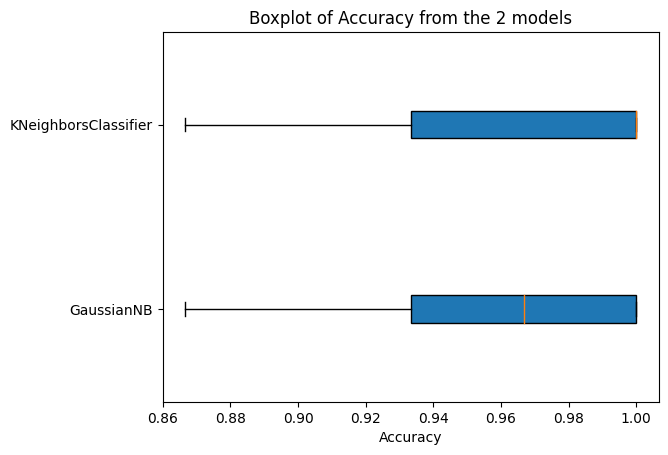

In [58]:
# [Your code here ...]
X = coded_data[:, 0:-1]
y = coded_data[:, -1]

clf_gnb = GaussianNB()
gnb_scores = cross_val_score(clf_gnb, iris_data.data, iris_data.target,
                             scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))

clf_knn = KNeighborsClassifier(n_neighbors=21)
knn_scores = cross_val_score(clf_knn, iris_data.data, iris_data.target,
                             scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))

plt.boxplot(x=[gnb_scores, knn_scores], labels=['GaussianNB',
            'KNeighborsClassifier'], vert=False, patch_artist=True)
plt.xlabel('Accuracy')
plt.title('Boxplot of Accuracy from the 2 models')

In [59]:
print('GaussianNB\nMean acc = ', gnb_scores.mean(), 'Std acc = ', gnb_scores.std())
print('KNeighborsClassifier\nMean acc = ', knn_scores.mean(), 'Std acc = ', knn_scores.std())

GaussianNB
Mean acc =  0.9533333333333335 Std acc =  0.052068331172711015
KNeighborsClassifier
Mean acc =  0.9666666666666668 Std acc =  0.04472135954999579


In [60]:
## t-test
from scipy import stats
stats.ttest_ind(gnb_scores, knn_scores)

Ttest_indResult(statistic=-0.5827715174143575, pvalue=0.5672768905605589)

**Commment:** Here the p-value = **0.5672768905605589**, so we do not reject the null hypothesis. This mean that there is not enough evidence to show that the difference in accuracy of the 2 models is statistically significant.